<hr>
<h2>Real Estate Valuation</h2> <br>
<b>1.</b> <i>Data Analysis</i><br>
<b>2.</b> <i>Feature Engineering</i>
<ul>a) Normalize<br>
    b) Add New Feature<br>
    c) Clustering<br>
    d) Omit Outliers<br>
</ul>
<b>3.</b> <i>Final Subsets</i><br>
<b>4.</b> <i>Result</i>
<hr>

In [2]:
#import package 

#Analysis 
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import scipy as sp

 #Visulization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
from IPython.core.pylabtools import figsize

#import gc

In [3]:
#Original Data
data = pd.read_excel('Real estate valuation data set.xlsx')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<h3>1. Data Analysis</h3><hr>
<ul>
    X1 transaction date <i>(independent)</i><br>
   X2 house age <i>(independent)</i><br>
   X3 distance to the nearest MRT station <i>(independent)</i><br>
   X4 number of convenience stores <i>(independent)</i> <br>
   X5 latitude <i>(independent)</i><br>
   X6 longitude <i>(independent)</i><br>
    Y house price of unit area <i><b>(Target)</b></i><br>
</ul>

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64


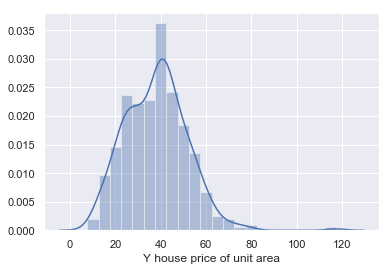

In [3]:
#Target value. Check Normality and Overall descriptions.
figsize = (8,6)
print(data['Y house price of unit area'].describe())
sns.distplot(data['Y house price of unit area'])

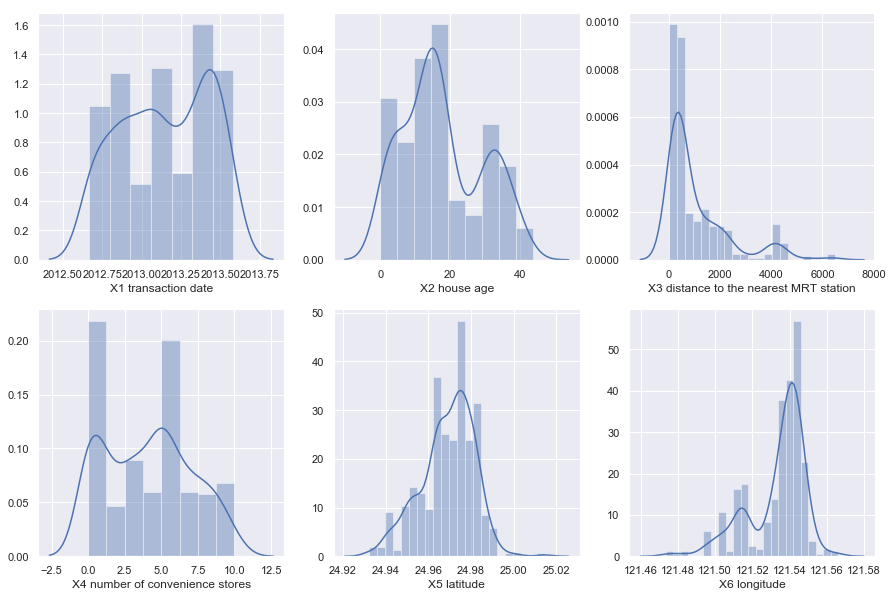

In [4]:
#Check Skewness of all the given Variables 
fig = plt.figure(figsize = (15,10))

fig.add_subplot(2,3,1)
res = sns.distplot(data['X1 transaction date'])

fig.add_subplot(2,3,2)
res = sns.distplot(data['X2 house age'])

fig.add_subplot(2,3,3)
res = sns.distplot(data['X3 distance to the nearest MRT station'])

fig.add_subplot(2,3,4)
res = sns.distplot(data['X4 number of convenience stores'])

fig.add_subplot(2,3,5)
res = sns.distplot(data['X5 latitude'])

fig.add_subplot(2,3,6)
res = sns.distplot(data['X6 longitude'])


<h4>Result: X3 is skewed</h4>
<i>Notd: latitude and logitude is coordination and thus normalization is unecessary </i>

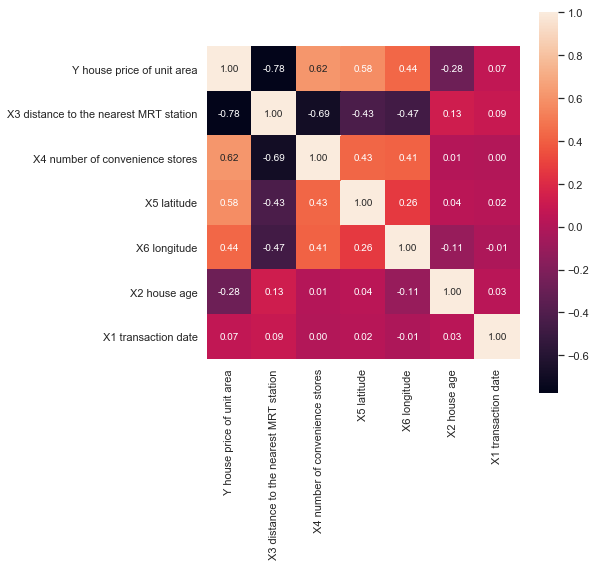

In [5]:
#Remove No. which is not a variable
dt = data.loc[:,'X1 transaction date':'Y house price of unit area']

#Check Correlations of Values by using Spearman Method
corr_data = dt.corr(method='spearman')

#Use abs values to consider inverse proportional relation ships.
cor_cols = abs(corr_data).nlargest(n=7, columns='Y house price of unit area').index
cor = np.array(sp.stats.spearmanr(data[cor_cols].values))[0]

plt.figure(figsize=(7,7))

#heat map of variables.
sns.set(font_scale=1)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size':10}, 
           xticklabels=cor_cols.values, yticklabels=cor_cols.values)

<h5>Traning model without Feature Engineering <i>(control condition)</i></h5>

In [48]:
#get sqrt of mean square error
def rmse (yt, yp):
    return np.sqrt(np.mean((yt-yp)**2))

#train model.
def train(model, x, y) :
    model.fit(x,y)
    return

#test model
def test(model, xtest, ytest) :
    predictions = model.predict(xtest)
    model_rmse = rmse(ytest, predictions)
    return model_rmse

In [55]:
#Split data set into train set and test set.
#Use Random_state as 0, for Easy comparison during multiple experiments.
#Use dt instead of data sicne data includes No. which is not a variable of Y

train_x = data.sample(frac=0.8,random_state=0)
test_x = data.drop(train_x.index)

train_y = train_x.pop('Y house price of unit area')
test_y = test_x.pop('Y house price of unit area')

In [56]:
from sklearn.kernel_ridge import KernelRidge

#Used KernelRidge Method.
reg = KernelRidge()
train(reg, train_x, train_y)

or_err1 = test(reg, train_x, train_y)
print("train rmse: ", or_err1)

or_err2 = test(reg, test_x, test_y)
print("test rmse: ", or_err2)

or_score1=reg.score(train_x,train_y)
or_score2=reg.score(test_x,test_y)

print("Training Set Accuracy Score : {:.2f}".format(or_score1))
print("Test Set Accuracy Score : {:.2f}".format(or_score2))

train rmse:  9.289724569724049
test rmse:  8.618268226137477
Training Set Accuracy Score : 0.54
Test Set Accuracy Score : 0.54


<h3>2. Feature Engineering</h3><hr>
<i><h4>a) Normalize</h4></i>
As we can see from the analysis, X3 feature, which has the greatest correlation is skewed.<br>
Thus, Normalization will improve the accuracy

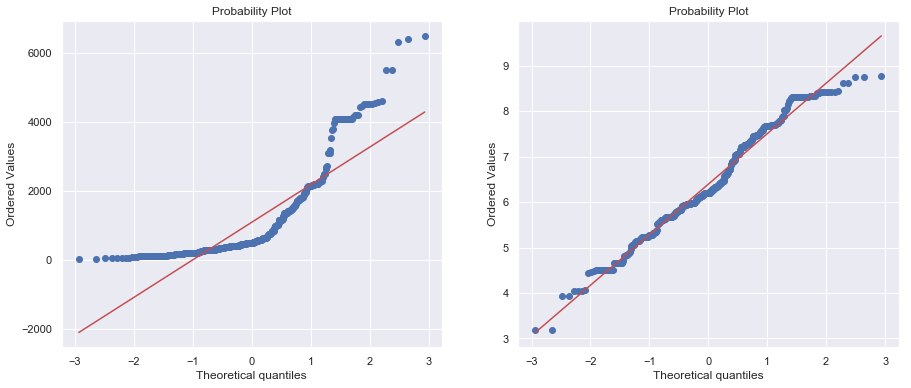

In [9]:
fig = plt.figure(figsize = (15,6))

fig.add_subplot(1,2,1)
res = stats.probplot(data['X3 distance to the nearest MRT station'], plot=plt)

#Use Logarithm to Normalize
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(data['X3 distance to the nearest MRT station']), plot=plt)

In [57]:
FE_dt = data.loc[:,'X1 transaction date':'Y house price of unit area']
#Normalize X3.
FE_dt['X3 distance to the nearest MRT station'] = np.log1p(FE_dt['X3 distance to the nearest MRT station'].values)

In [58]:
#Data sets after Feature Engineering
#Since Random state = 0, selection of sets will not changed.
FE_train_x = FE_dt.sample(frac=0.8,random_state=0)
FE_test_x = FE_dt.drop(FE_train_x.index)

FE_train_y = FE_train_x.pop('Y house price of unit area')
FE_test_y = FE_test_x.pop('Y house price of unit area')

In [59]:
#Used KernelRidge Method.

print("Original Data Set")
print("train rmse: ", or_err1)
print("test rmse: ", or_err2)
print("Training Set Accuracy Score : {:.2f}".format(or_score1))
print("Test Set Accuracy Score : {:.2f}".format(or_score2))
print('-------------------------------------------------------------')
reg = KernelRidge()
train(reg, FE_train_x, FE_train_y)

print("Apply Normalization")
nor_err1 = test(reg, FE_train_x, FE_train_y)
print("train rmse: ", nor_err1)

nor_err2 = test(reg, FE_test_x, FE_test_y)
print("test rmse: ", nor_err2)

nor_score1=reg.score(FE_train_x,FE_train_y)
nor_score2=reg.score(FE_test_x,FE_test_y)

print("Training Set Accuracy Score : {:.2f}".format(nor_score1))
print("Test Set Accuracy Score : {:.2f}".format(nor_score2))

Original Data Set
train rmse:  9.289724569724049
test rmse:  8.618268226137477
Training Set Accuracy Score : 0.54
Test Set Accuracy Score : 0.54
-------------------------------------------------------------
Apply Normalization
train rmse:  8.816490529364003
test rmse:  8.569472332590218
Training Set Accuracy Score : 0.59
Test Set Accuracy Score : 0.54


<hr>
<i><h4>b) Add New Feature</h4></i>
From my intuitive, temperatures of house is might affect to the price of house. <br>
Thus, I used folium to visualize heatmap to recognize temperature differences. <br>
Then, used Open Weather Map api to collect daytime temperatures of house according to latitude and longitude

In [4]:
#Check HeatMap of New Taipei City
import folium # for map visualization
from folium import plugins
houses_heatmap = folium.Map(location = [data['X5 latitude'].mean(), data['X6 longitude'].mean()], zoom_start = 13)
houses_heatmap.add_child(plugins.HeatMap([[row['X5 latitude'], row['X6 longitude']] for name, row in data.iterrows()]))

houses_heatmap

![Heatmap Caputer](./Heatmap_Capture.JPG)

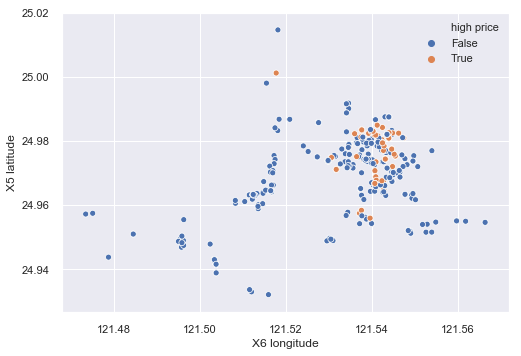

In [34]:
tmp_dt = dt.loc[:,'X5 latitude':'Y house price of unit area']
#high 30% of houses
tmp_dt['high price'] = tmp_dt['Y house price of unit area'] > 46
sns.scatterplot(x='X6 longitude', y='X5 latitude', hue='high price', data=tmp_dt);

Naively, We can say Warmer location has higher price. (Or the location ca be more developed city with more people)

In [ ]:
#Open Weather Map API
from pyowm import OWM
import time

#init OWM with API
lst =[]
wapi_key = 'b667632018f58959c54d863e3b8fc6f2'
owm = OWM(wapi_key)

lat = dt['X5 latitude'].values
lon = dt['X6 longitude'].values

#used sleep since the api only allows 60 calls per min.
#Thus to prevent timeout 
#(takes about 10 mins. Thus, I recommend to use data set that I already extract temperature.)
for c in range(len(lat)) :
    if c % 50 == 0 and c!=0:
        time.sleep(65)
    la = float(lat[c])
    lo = float(lon[c])
    obs = owm.weather_at_coords(la,lo)
    w = obs.get_weather()
    temp = w.get_temperature(unit='celsius')['temp']
    lst.append(temp)

tmp_df = pd.DataFrame(lst, columns=['temperature'])

In [13]:
#to Write the Excel File.
#FE_dt = data.loc[:,'X1 transaction date':'Y house price of unit area']
#FE_dt['temperature'] = tmp_df
#FE_dt.to_excel('./Real estate valuation data set temp applied.xlsx',index=False)

FE_dt = pd.read_excel('./Real estate valuation data set temp applied.xlsx')
FE_dt = FE_dt.loc[:,'X1 transaction date':'temperature']
FE_dt.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,temperature
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,30.76
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,30.76
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,30.77
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,30.77
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,30.76


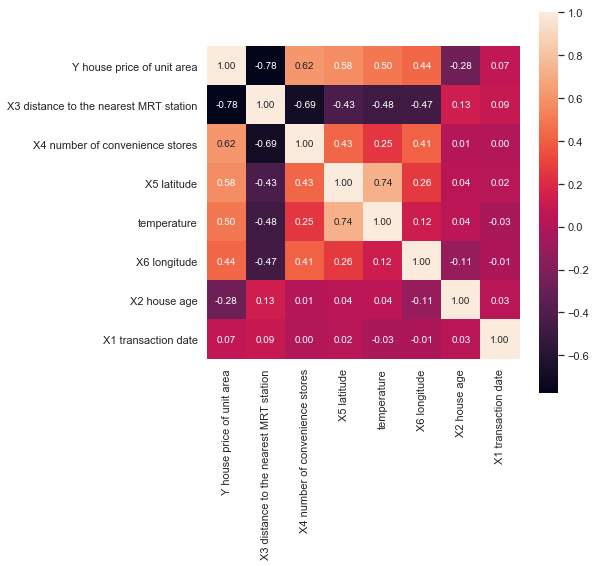

In [14]:
#Show Correlation of Temperature.
#Check Correlations of Values by using Spearman Method
FE_corr_data = FE_dt.corr(method='spearman')

#Use abs values to consider inverse proportional relation ships.
FEcor_cols = abs(FE_corr_data).nlargest(n=8, columns='Y house price of unit area').index
FEcor = np.array(sp.stats.spearmanr(FE_dt[FEcor_cols].values))[0]

plt.figure(figsize=(7,7))

#heat map of variables.
sns.set(font_scale=1)
sns.heatmap(FEcor, fmt='.2f', annot=True, square=True, annot_kws={'size':10}, 
           xticklabels=FEcor_cols.values, yticklabels=FEcor_cols.values)

In [15]:
#Data sets after Feature Engineering
#Since Random state = 0, selection of sets will not changed.
FE_train_x = FE_dt.sample(frac=0.8,random_state=0)
FE_test_x = FE_dt.drop(FE_train_x.index)

FE_train_y = FE_train_x.pop('Y house price of unit area')
FE_test_y = FE_test_x.pop('Y house price of unit area')

In [16]:
#Used KernelRidge Method.

print("Original Data Set")
print("train rmse: ", or_err1)
print("test rmse: ", or_err2)
print("Training Set Accuracy Score : {:.2f}".format(or_score1))
print("Test Set Accuracy Score : {:.2f}".format(or_score2))
print('-------------------------------------------------------------')
reg = KernelRidge()
train(reg, FE_train_x, FE_train_y)

print("Apply Temperature")
tmp_err1 = test(reg, FE_train_x, FE_train_y)
print("train rmse: ", tmp_err1)

tmp_err2 = test(reg, FE_test_x, FE_test_y)
print("test rmse: ", tmp_err2)

tmp_score1=reg.score(FE_train_x,FE_train_y)
tmp_score2=reg.score(FE_test_x,FE_test_y)

print("Training Set Accuracy Score : {:.2f}".format(tmp_score1))
print("Test Set Accuracy Score : {:.2f}".format(tmp_score2))

Original Data Set
train rmse:  9.289724569724049
test rmse:  8.618268226137477
Training Set Accuracy Score : 0.54
Test Set Accuracy Score : 0.54
-------------------------------------------------------------
Apply Temperature
train rmse:  8.854266622354524
test rmse:  8.499066738158351
Training Set Accuracy Score : 0.58
Test Set Accuracy Score : 0.55


<hr>
<i><h4>c) Clustering</h4></i>
In my intuitive, houses in same zone will have similar prices.<br>
Therefore, I used GoogleMaps API to use reverse geo code to calculate zipcode and city from coordinates.<br>
However, all the houses instead of 3 have same zipcode and thus, I used K-mean clustering to cluster houses by locations.

d:\anaconda3\envs\tensor_practice\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


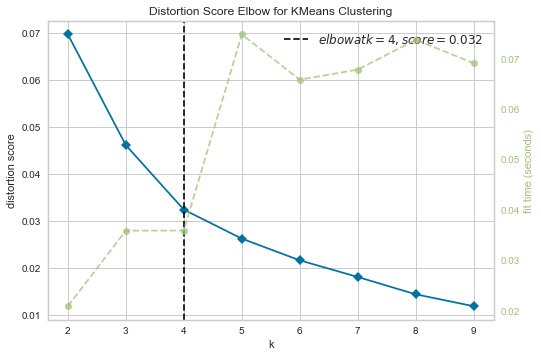

In [17]:
#Determine K by Elbow Method
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

coord = data.loc[:,'X5 latitude':'X6 longitude']

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(coord)    # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [18]:
#K = 4, seed = 42
#K-means Clustering
FE_dt = data.loc[:,'X1 transaction date':'Y house price of unit area']
kmeans = KMeans(n_clusters=4, random_state=42).fit(coord)

coord_cluster = kmeans.predict(coord)

FE_dt['coord_cluster'] = coord_cluster
FE_dt['coord_cluster'] = FE_dt['coord_cluster'].map(lambda x: 'c_' + str(x).rjust(2, '0'))

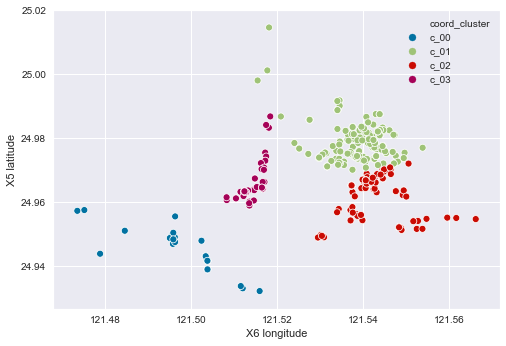

In [19]:
sns.set_style(style='darkgrid')
sns.scatterplot(x='X6 longitude', y='X5 latitude', hue='coord_cluster', hue_order=np.sort(FE_dt['coord_cluster'].unique()), data=FE_dt);

In [20]:
price_by_cluster = FE_dt.groupby(['coord_cluster'])['Y house price of unit area'].agg({'mean', 'std'}).reset_index()
FE_dt = pd.merge(FE_dt, price_by_cluster, how='right',on='coord_cluster')

In [21]:
FE_dt.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,coord_cluster,mean,std
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,c_01,45.457426,11.072864
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,c_01,45.457426,11.072864
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,c_01,45.457426,11.072864
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,c_01,45.457426,11.072864
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,c_01,45.457426,11.072864


In [22]:
del FE_dt['coord_cluster']

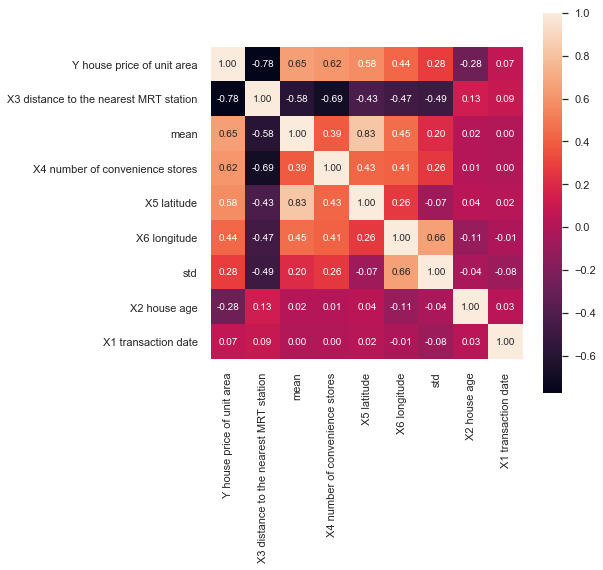

In [23]:
#Show Correlation of Clustering mean.
#Check Correlations of Values by using Spearman Method
FE_corr_data = FE_dt.corr(method='spearman')

#Use abs values to consider inverse proportional relation ships.
FEcor_cols = abs(FE_corr_data).nlargest(n=10, columns='Y house price of unit area').index
FEcor = np.array(sp.stats.spearmanr(FE_dt[FEcor_cols].values))[0]

plt.figure(figsize=(7,7))

#heat map of variables.
sns.set(font_scale=1)
sns.heatmap(FEcor, fmt='.2f', annot=True, square=True, annot_kws={'size':10}, 
           xticklabels=FEcor_cols.values, yticklabels=FEcor_cols.values)

In [24]:
#Data sets after Feature Engineering
#Since Random state = 0, selection of sets will not changed.
FE_train_x = FE_dt.sample(frac=0.8,random_state=0)
FE_test_x = FE_dt.drop(FE_train_x.index)

FE_train_y = FE_train_x.pop('Y house price of unit area')
FE_test_y = FE_test_x.pop('Y house price of unit area')

In [25]:
#Used KernelRidge Method.

print("Original Data Set")
print("train rmse: ", or_err1)
print("test rmse: ", or_err2)
print("Training Set Accuracy Score : {:.2f}".format(or_score1))
print("Test Set Accuracy Score : {:.2f}".format(or_score2))
print('-------------------------------------------------------------')
reg = KernelRidge()
train(reg, FE_train_x, FE_train_y)

print("Apply Clustering")
clu_err1 = test(reg, FE_train_x, FE_train_y)
print("train rmse: ", clu_err1)

clu_err2 = test(reg, FE_test_x, FE_test_y)
print("test rmse: ", clu_err2)

clu_score1=reg.score(FE_train_x,FE_train_y)
clu_score2=reg.score(FE_test_x,FE_test_y)

print("Training Set Accuracy Score : {:.2f}".format(clu_score1))
print("Test Set Accuracy Score : {:.2f}".format(clu_score2))

Original Data Set
train rmse:  9.289724569724049
test rmse:  8.618268226137477
Training Set Accuracy Score : 0.54
Test Set Accuracy Score : 0.54
-------------------------------------------------------------
Apply Clustering
train rmse:  8.790055872291267
test rmse:  7.872250585168408
Training Set Accuracy Score : 0.58
Test Set Accuracy Score : 0.68


<hr>
<i><h4>d) Omit Outliers</h4></i>
When I observed the features, inordinary outlier was discovered.<br>
Thus, omit outlier to improve accuracy

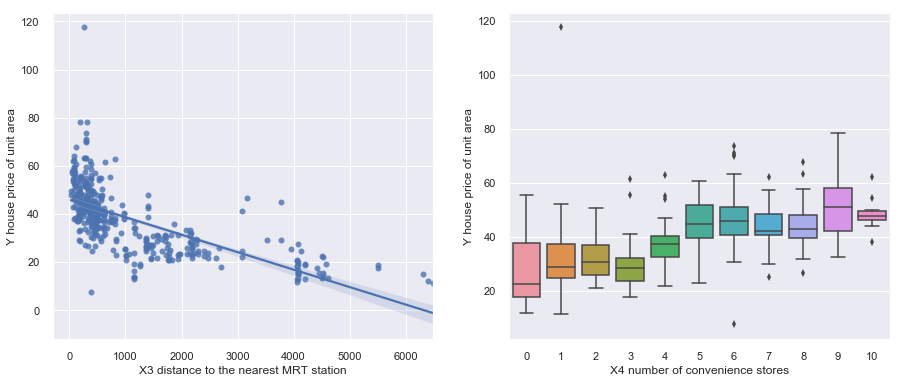

In [26]:
#To see relationships between 2 features that have highst correlations and target.
fig = plt.figure(figsize = (15,6))

fig.add_subplot(1,2,1)
d = pd.concat([data['Y house price of unit area'], data['X3 distance to the nearest MRT station']], axis=1)
sns.regplot(x='X3 distance to the nearest MRT station', y="Y house price of unit area", data=d)

fig.add_subplot(1,2,2)
d = pd.concat([data['Y house price of unit area'], data['X4 number of convenience stores']], axis=1)
sns.boxplot(x='X4 number of convenience stores', y="Y house price of unit area", data=d)

In [27]:
#find outlier
data.loc[(data['Y house price of unit area']>100)]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,271,2013.333333,10.8,252.5822,1,24.9746,121.53046,117.5


In [28]:
#delete outlier
FE_dt = data.loc[data['No'] != 271]
FE_dt = FE_dt.loc[:,"X1 transaction date":"Y house price of unit area"]
FE_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 413
Data columns (total 7 columns):
X1 transaction date                       413 non-null float64
X2 house age                              413 non-null float64
X3 distance to the nearest MRT station    413 non-null float64
X4 number of convenience stores           413 non-null int64
X5 latitude                               413 non-null float64
X6 longitude                              413 non-null float64
Y house price of unit area                413 non-null float64
dtypes: float64(6), int64(1)
memory usage: 25.8 KB


In [29]:
#Data sets after Feature Engineering
#Since Random state = 0, selection of sets will not changed.
FE_train_x = FE_dt.sample(frac=0.8,random_state=0)
FE_test_x = FE_dt.drop(FE_train_x.index)

FE_train_y = FE_train_x.pop('Y house price of unit area')
FE_test_y = FE_test_x.pop('Y house price of unit area')

In [30]:
#Used KernelRidge Method.

print("Original Data Set")
print("train rmse: ", or_err1)
print("test rmse: ", or_err2)
print("Training Set Accuracy Score : {:.2f}".format(or_score1))
print("Test Set Accuracy Score : {:.2f}".format(or_score2))
print('-------------------------------------------------------------')
reg = KernelRidge()
train(reg, FE_train_x, FE_train_y)

print("Delete Outlier")
out_err1 = test(reg, FE_train_x, FE_train_y)
print("train rmse: ", out_err1)

out_err2 = test(reg, FE_test_x, FE_test_y)
print("test rmse: ", out_err2)

out_score1=reg.score(FE_train_x,FE_train_y)
out_score2=reg.score(FE_test_x,FE_test_y)

print("Training Set Accuracy Score : {:.2f}".format(out_score1))
print("Test Set Accuracy Score : {:.2f}".format(out_score2))

Original Data Set
train rmse:  9.289724569724049
test rmse:  8.618268226137477
Training Set Accuracy Score : 0.54
Test Set Accuracy Score : 0.54
-------------------------------------------------------------
Delete Outlier
train rmse:  8.31928482596742
test rmse:  8.503784215207865
Training Set Accuracy Score : 0.59
Test Set Accuracy Score : 0.55


<h3>3. Final Subset</h3><hr>
Data set that applied all 4 feature engineering.

In [64]:
#original data set
FE_dt = pd.read_excel('./Real estate valuation data set.xlsx')

#get Temperature data. (b)
tmp_dt = pd.read_excel('./Real estate valuation data set temp applied.xlsx')
FE_dt['temperature'] = tmp_dt['temperature']

#Normalize X3. (a)
FE_dt['X3 distance to the nearest MRT station'] = np.log1p(FE_dt['X3 distance to the nearest MRT station'].values)

#Clustering (c)
coord = FE_dt.loc[:,'X5 latitude':'X6 longitude']
#K = 4, seed = 42
#K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42).fit(coord)

coord_cluster = kmeans.predict(coord)

FE_dt['coord_cluster'] = coord_cluster
FE_dt['coord_cluster'] = FE_dt['coord_cluster'].map(lambda x: 'c_' + str(x).rjust(2, '0'))

price_by_cluster = FE_dt.groupby(['coord_cluster'])['Y house price of unit area'].agg({'mean', 'std'}).reset_index()
FE_dt = pd.merge(FE_dt, price_by_cluster, how='right',on='coord_cluster')
del FE_dt['coord_cluster']

#Delete outlier (d)
FE_dt = FE_dt.loc[FE_dt['No'] != 271]

del FE_dt['No']
FE_dt.to_excel('./Real estate valuation best subset.xlsx')
FE_dt.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,temperature,mean,std
0,2012.916667,32.0,4.452937,10,24.98298,121.54024,37.9,30.76,45.457426,11.072864
1,2012.916667,19.5,5.728783,9,24.98034,121.53951,42.2,30.76,45.457426,11.072864
2,2013.583333,13.3,6.333252,5,24.98746,121.54391,47.3,30.77,45.457426,11.072864
3,2013.500000,13.3,6.333252,5,24.98746,121.54391,54.8,30.77,45.457426,11.072864
4,2012.833333,5.0,5.970160,5,24.97937,121.54245,43.1,30.76,45.457426,11.072864


In [65]:
#Data sets after Feature Engineering
#Since Random state = 0, selection of sets will not changed.
FE_train_x = FE_dt.sample(frac=0.8,random_state=0)
FE_test_x = FE_dt.drop(FE_train_x.index)

FE_train_y = FE_train_x.pop('Y house price of unit area')
FE_test_y = FE_test_x.pop('Y house price of unit area')

In [66]:
#Used KernelRidge Method.

print("Original Data Set")
print("train rmse: ", or_err1)
print("test rmse: ", or_err2)
print("Training Set Accuracy Score : {:.2f}".format(or_score1))
print("Test Set Accuracy Score : {:.2f}".format(or_score2))
print('-------------------------------------------------------------')
reg = KernelRidge()
train(reg, FE_train_x, FE_train_y)

print("Apply all Feature Engineering")
fin_err1 = test(reg, FE_train_x, FE_train_y)
print("train rmse: ", fin_err1)

fin_err2 = test(reg, FE_test_x, FE_test_y)
print("test rmse: ", fin_err2)

fin_score1=reg.score(FE_train_x,FE_train_y)
fin_score2=reg.score(FE_test_x,FE_test_y)

print("Training Set Accuracy Score : {:.2f}".format(fin_score1))
print("Test Set Accuracy Score : {:.2f}".format(fin_score2))

Original Data Set
train rmse:  9.289724569724049
test rmse:  8.618268226137477
Training Set Accuracy Score : 0.54
Test Set Accuracy Score : 0.54
-------------------------------------------------------------
Apply all Feature Engineering
train rmse:  6.961380892595012
test rmse:  8.349060937012393
Training Set Accuracy Score : 0.71
Test Set Accuracy Score : 0.59


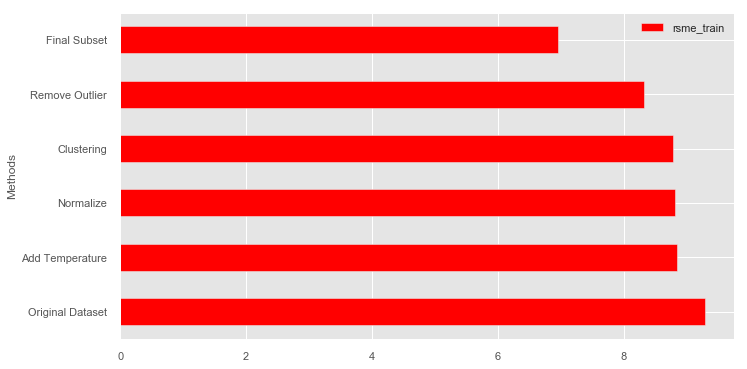

In [79]:

figsize(11,6)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"Methods":["Original Dataset","Normalize", "Add Temperature", "Clustering", "Remove Outlier", "Final Subset"],
                                "rsme_train": [or_err1, nor_err1, tmp_err1, clu_err1, out_err1, fin_err1]})
model_comparison = model_comparison.sort_values("rsme_train", ascending=False).plot(x="Methods", y="rsme_train", color="red", kind="barh")

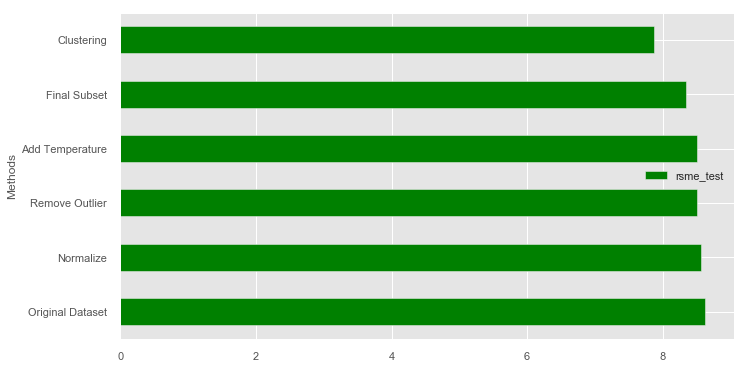

In [78]:

figsize(11,6)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"Methods":["Original Dataset","Normalize", "Add Temperature", "Clustering", "Remove Outlier", "Final Subset"],
                                "rsme_test": [or_err2, nor_err2, tmp_err2, clu_err2, out_err2, fin_err2]})
model_comparison = model_comparison.sort_values("rsme_test", ascending=False).plot(x="Methods", y="rsme_test", color="green", kind="barh")

<h3>4. Result</h3><hr>
<b>Lowest rmse(training set):</b> Final Subset<br>
<b>Lowest rmse(test set):</b> Clustering<br>
As a result, when unlabeled data is given, final subset will show the best performance to transductive semi-supervised learning<br>
and, applying only clustering will show the best performance to inductive semi-supervised learning<br>